# CONNECT TO SLEEPER API WITH LEAGUE ID

In [377]:
import sleeperpy as sp
import pandas as pd

league_id = 975215778016337920  # <======This is our league id

team_ids = ['NYJ','NYG','NE','ARI','DAL',
            'BAL','PHI','DET','CAR','SF',
            'KC','CHI','JAX','IND','NO',
            'LAC','ATL','MIN','MIA','LV',
            'BUF','LAR','DEN','CLE','CIN',
            'TB','TEN','PIT','SEA','HOU',
            'WAS','GB']

id_map = pd.read_csv('Fantasy/id_map.csv', index_col="Unnamed: 0")

# GATHER WEEK BY WEEK PLAYER DATA

In [378]:
LASTWEEK = 12
season_data = []
for week in range(1,LASTWEEK+1):
    week_stats = sp.Leagues.get_matchups(league_id, week)
    bigDict = dict()

    for team in week_stats:
        bigDict.update(team['players_points'])

    points = pd.Series(bigDict)
    season_data.append(points)
    
season_data = pd.concat(season_data, axis = 1)
season_data.columns = [f'Week{i}' for i in range(1,LASTWEEK+1)]


season_data['Team'] = [ele if ele in team_ids else id_map.team.loc[ele] for ele in season_data.index]
season_data.index = [id_map.full_name.loc[ele] + ', ' + id_map.position.loc[ele] if contains_number(ele) else ele + ', DEF' for ele in season_data.index]
season_data = season_data.fillna(0)

# ASSESS CORRELATIONS BETWEEN PLAYERS WITHIN THE SAME TEAM

NYJ


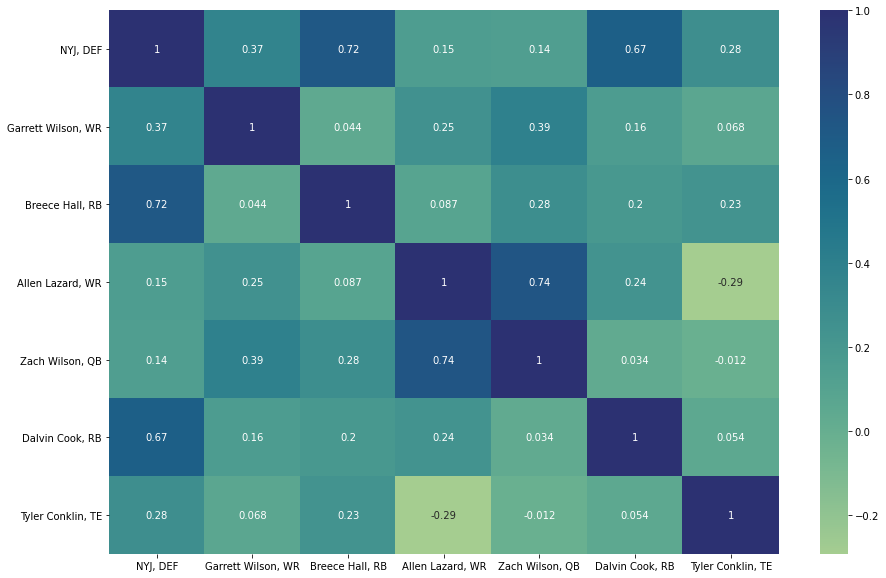

NYG


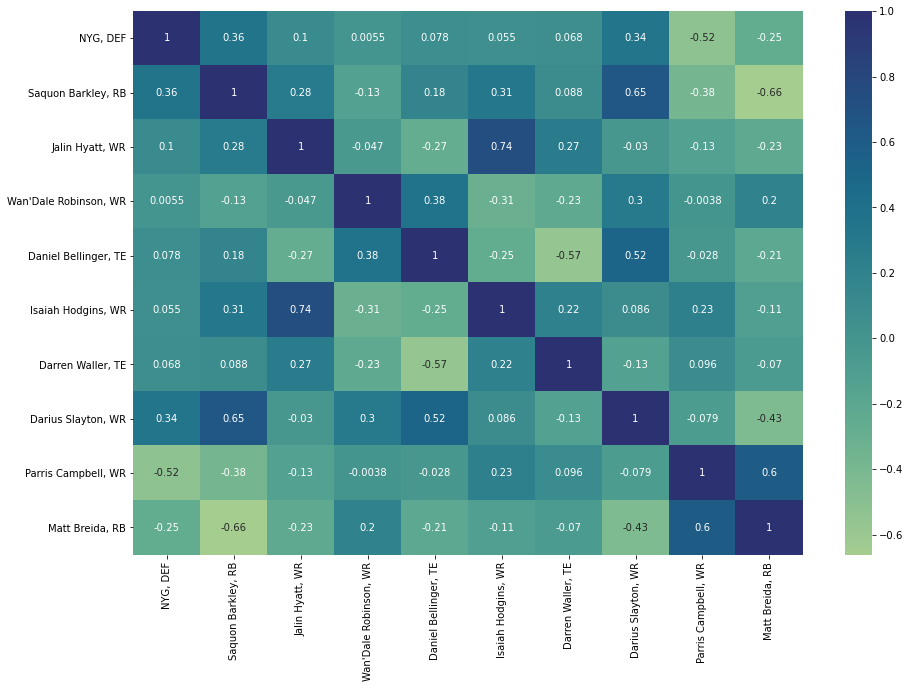

NE


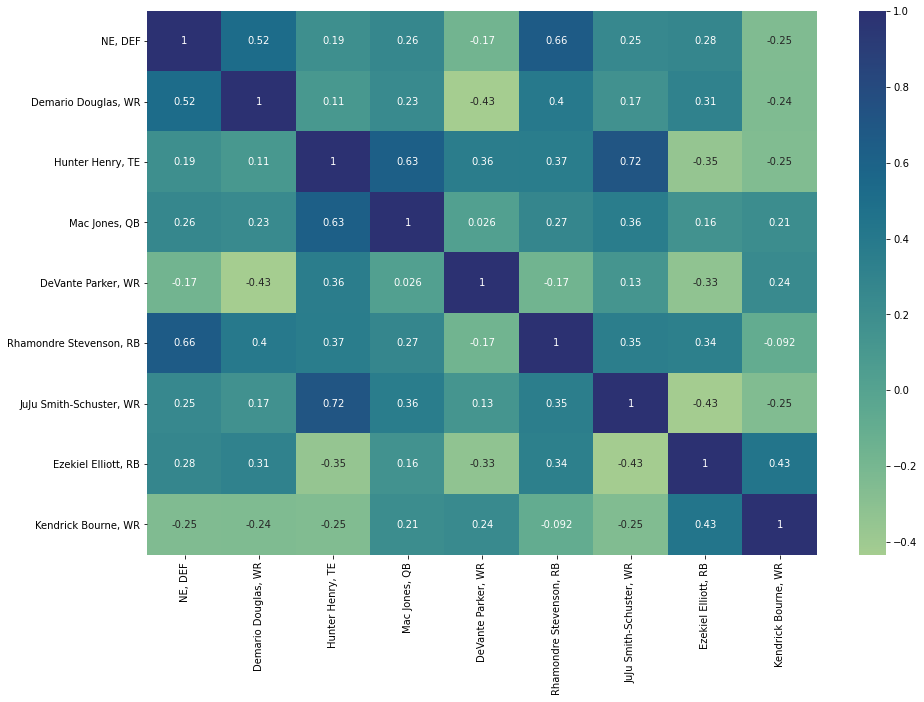

ARI


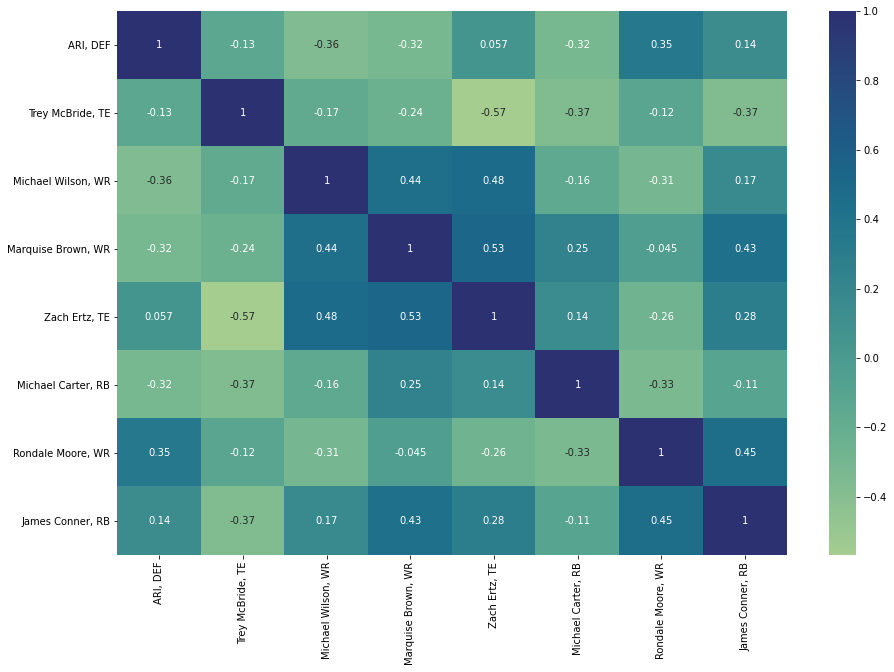

DAL


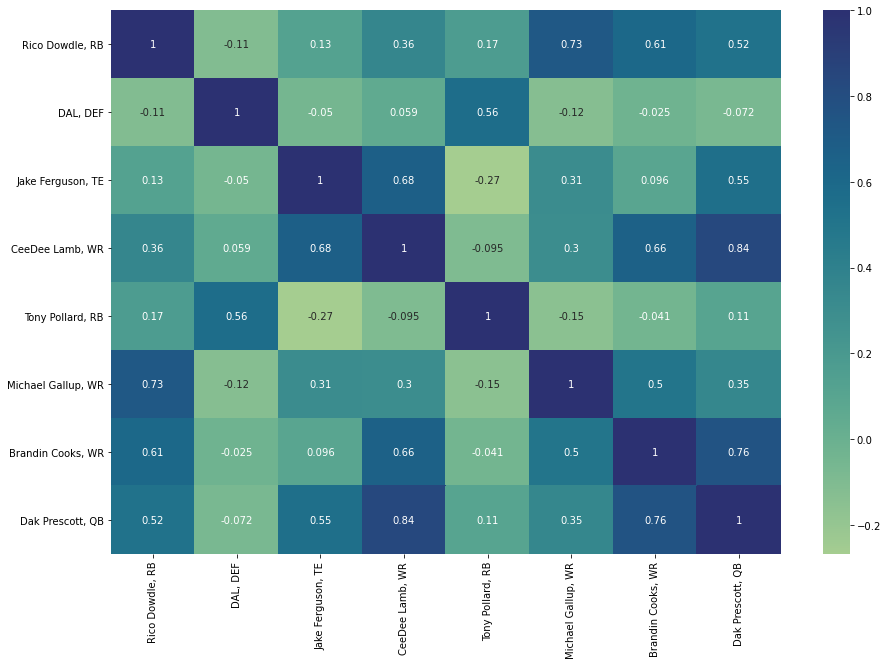

BAL


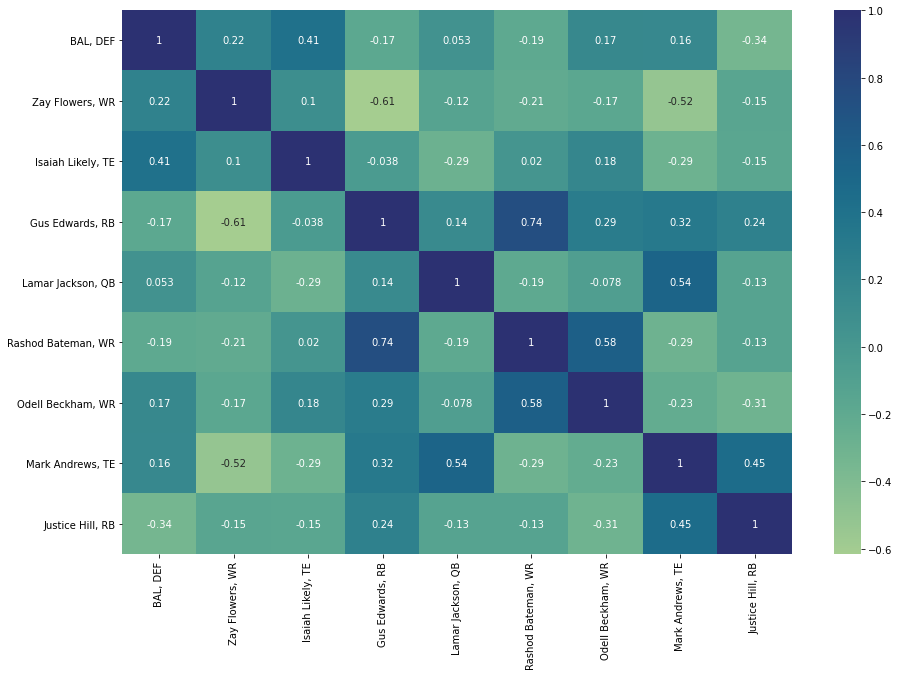

PHI


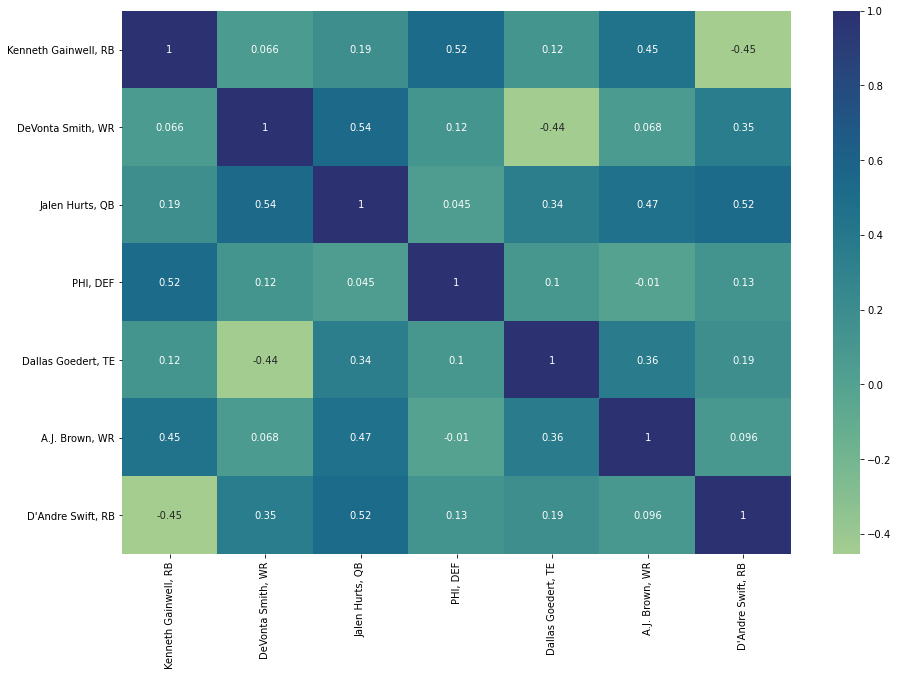

DET


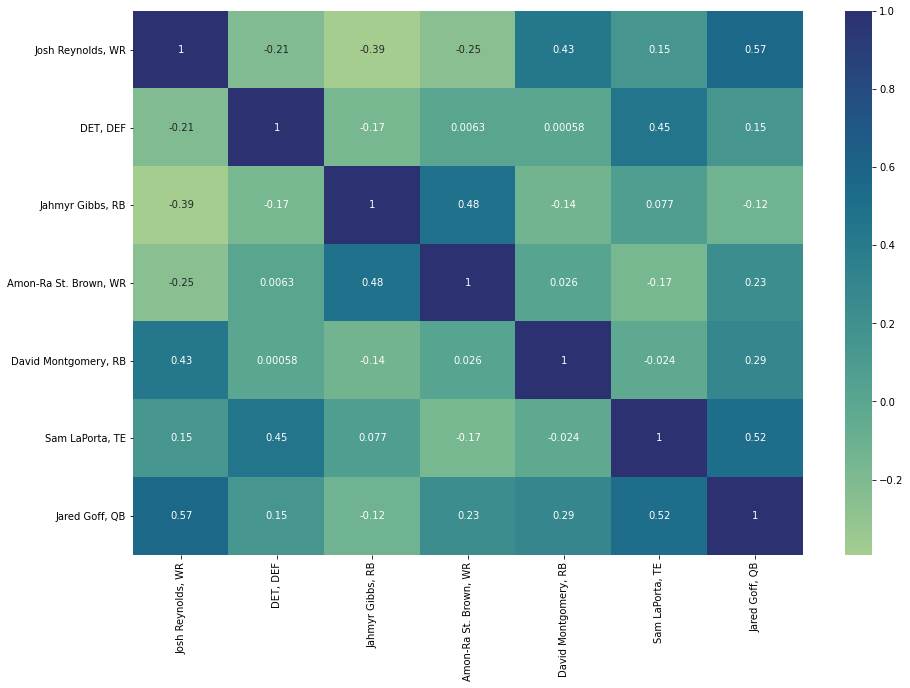

CAR


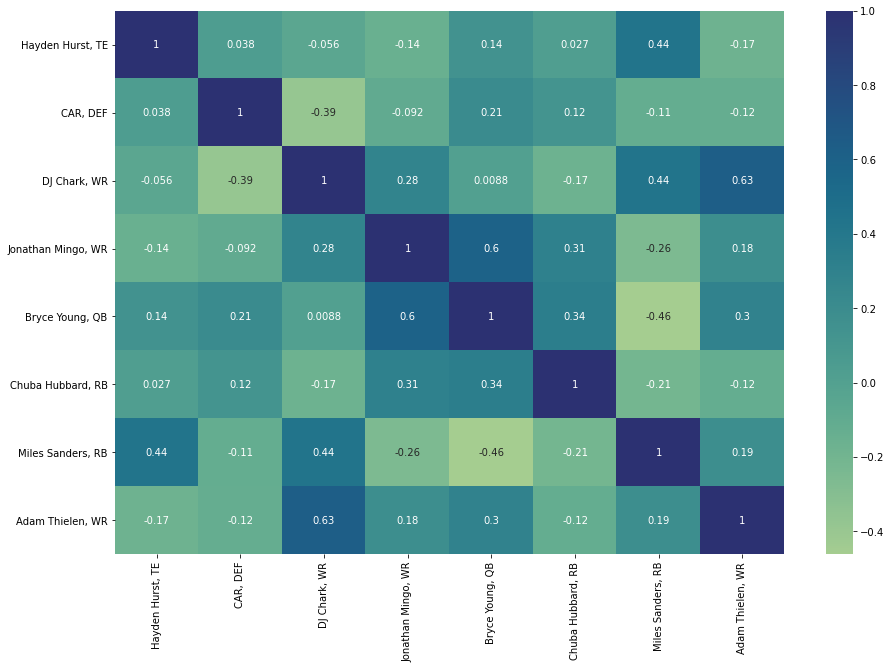

SF


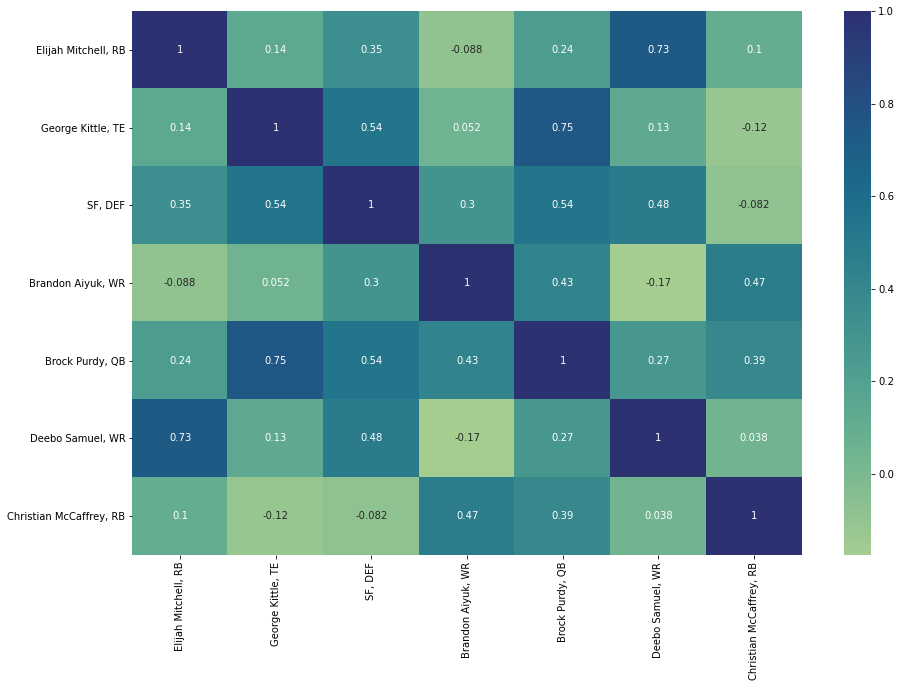

KC


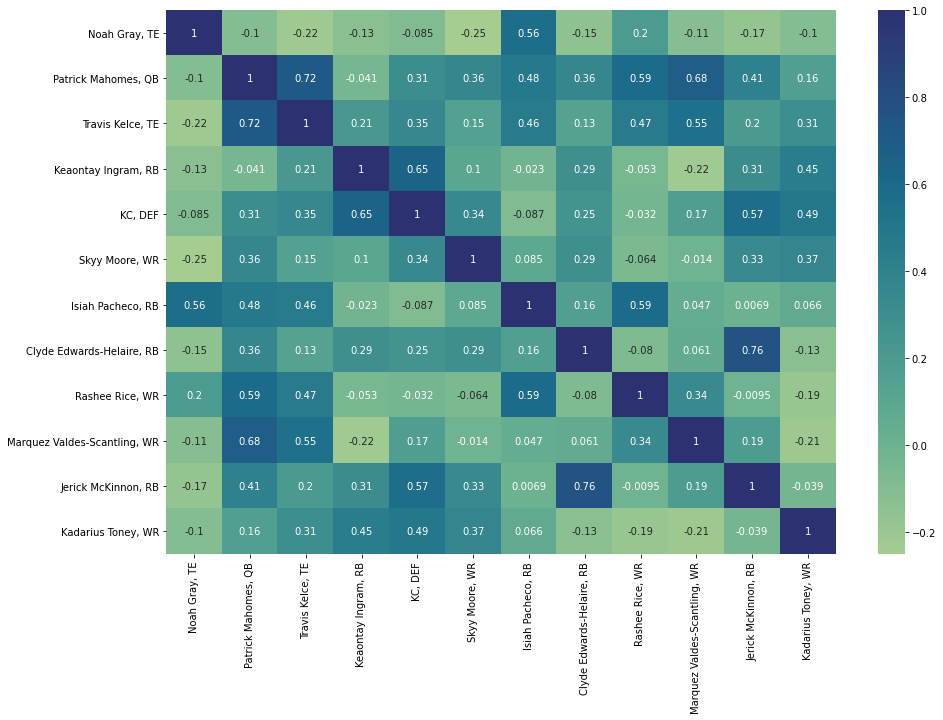

CHI


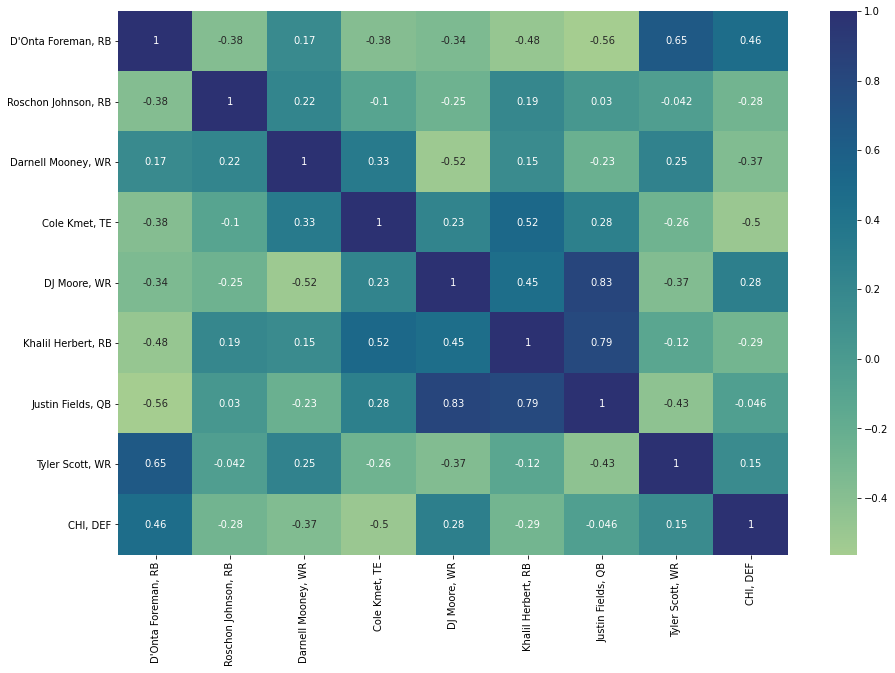

JAX


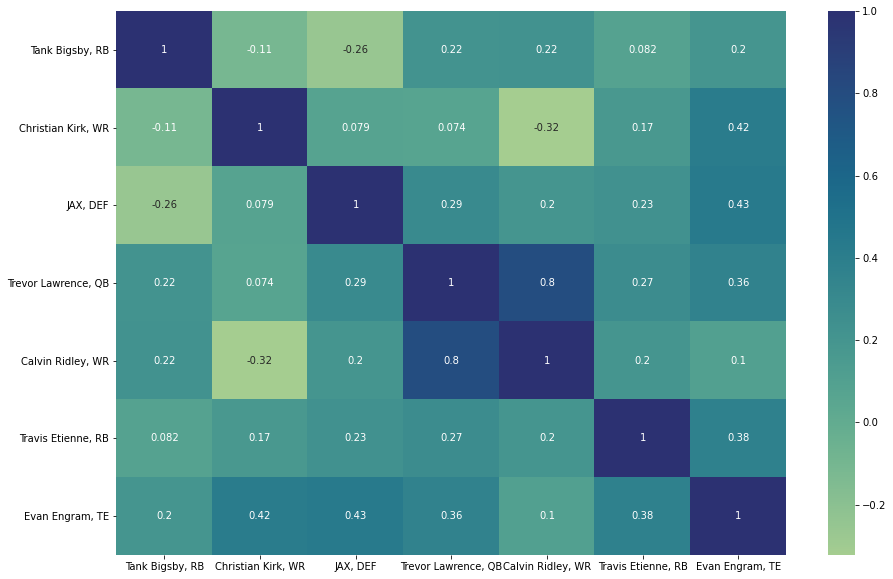

IND


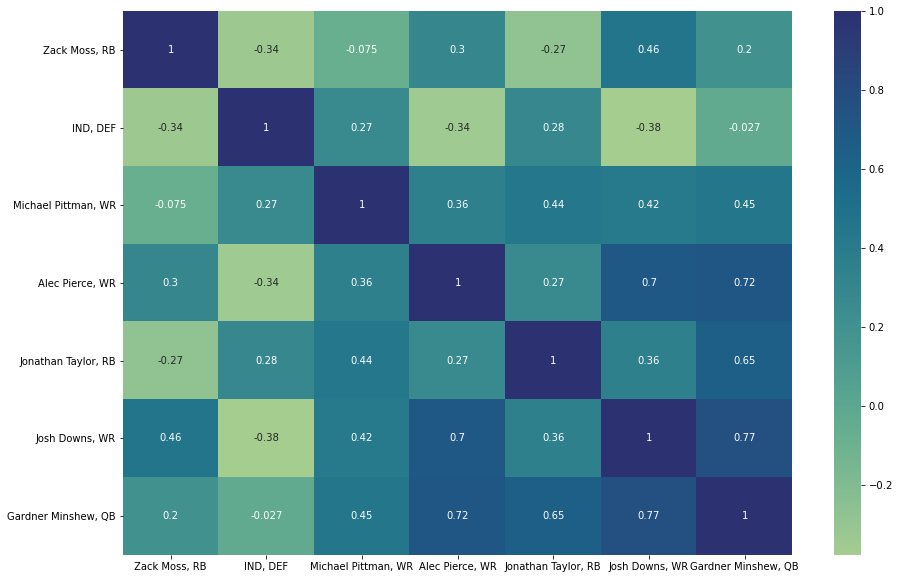

NO


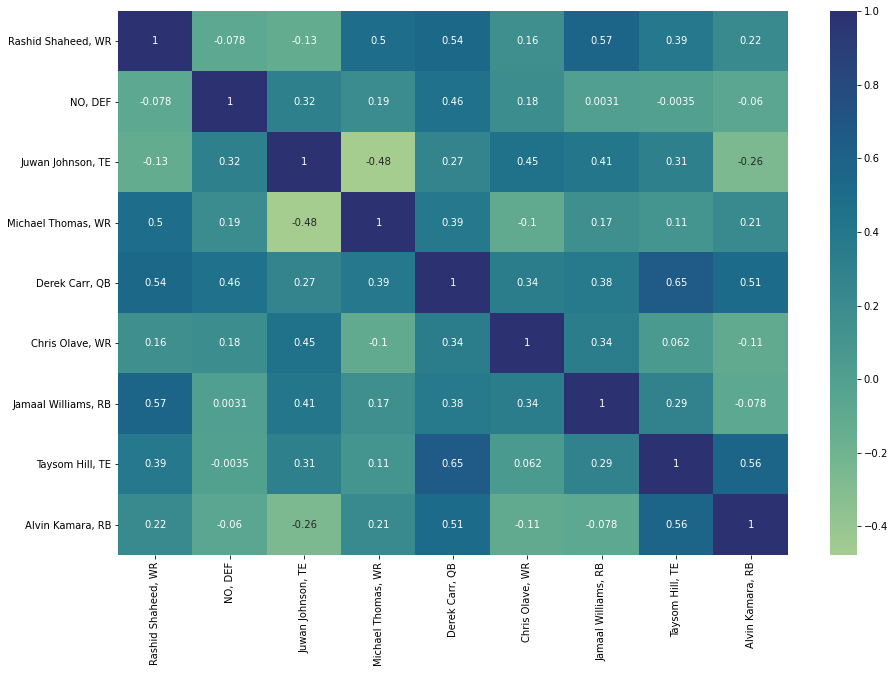

LAC


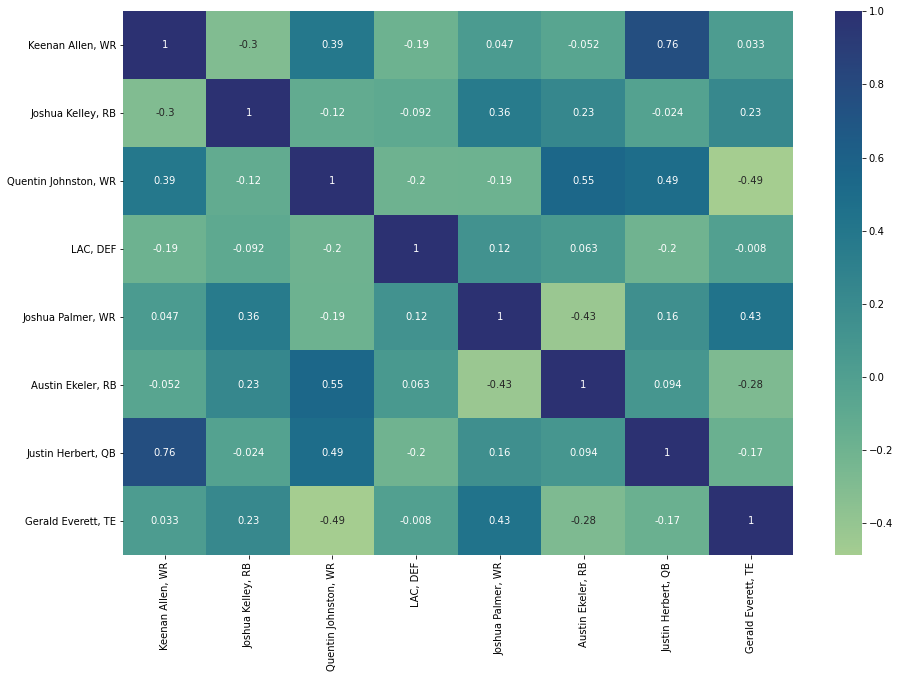

ATL


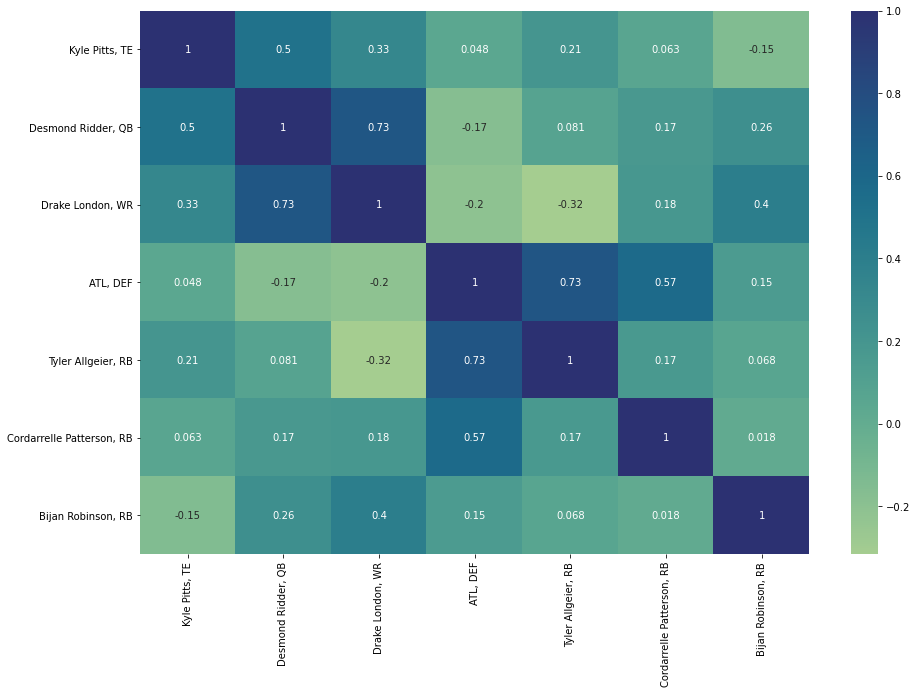

MIN


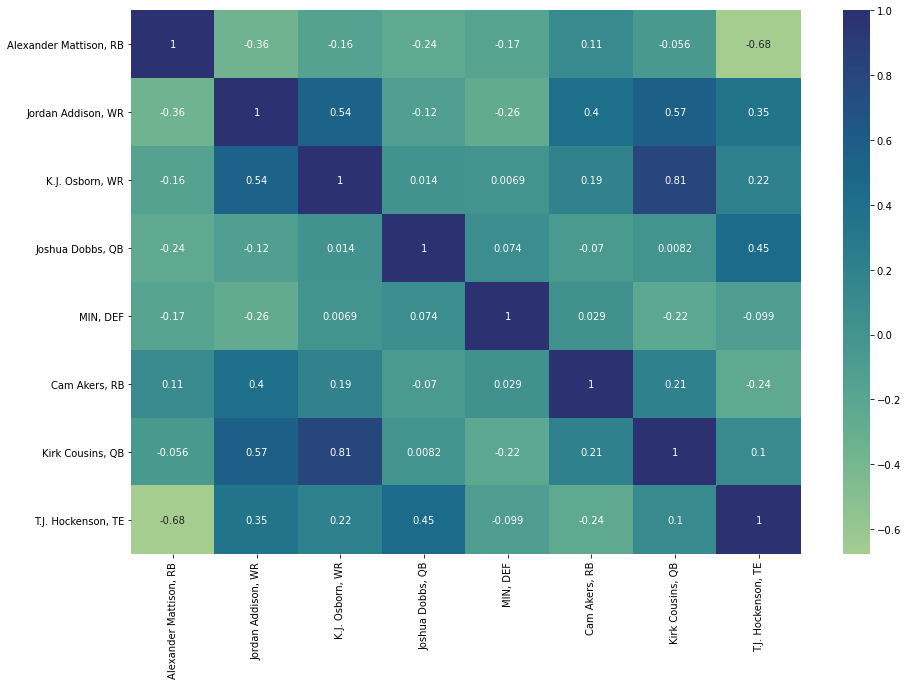

MIA


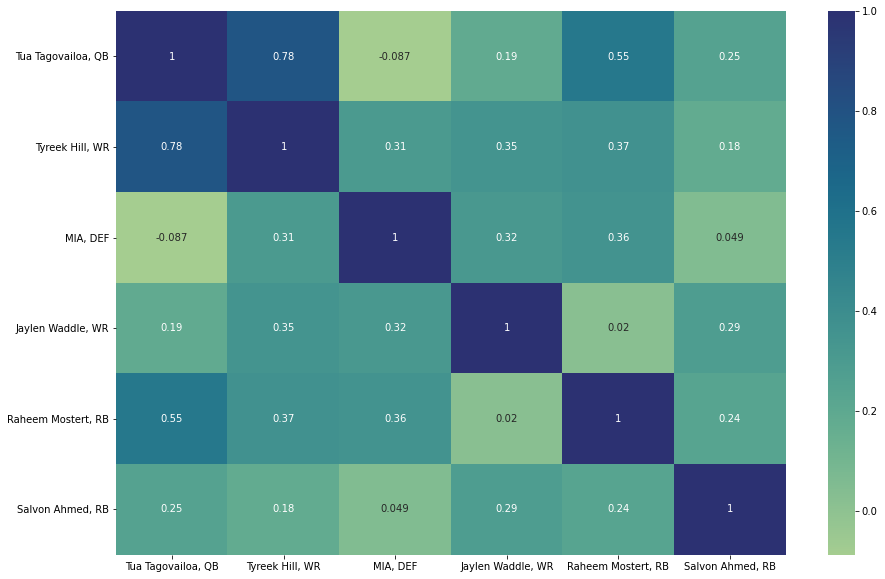

LV


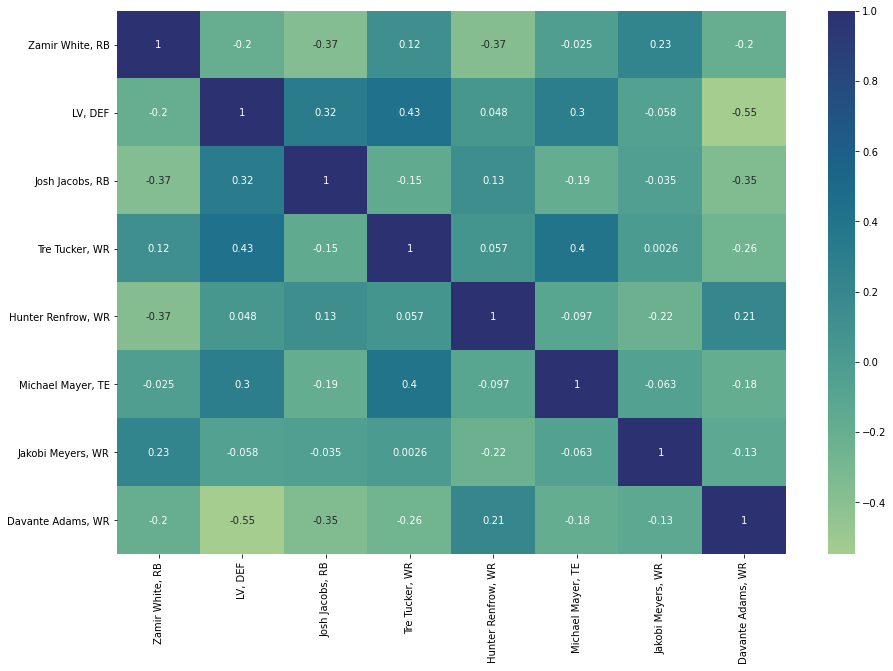

BUF


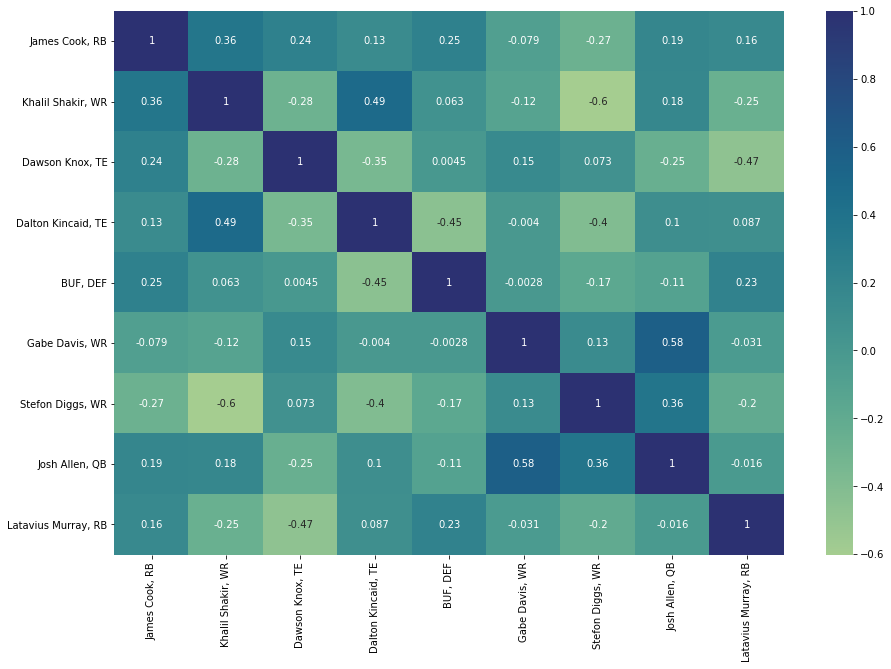

LAR


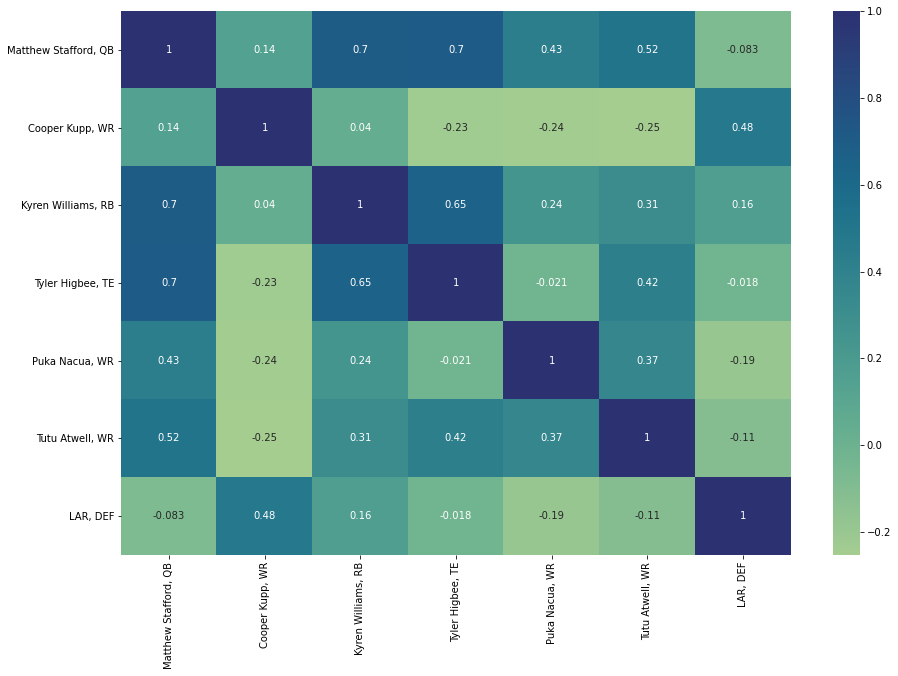

DEN


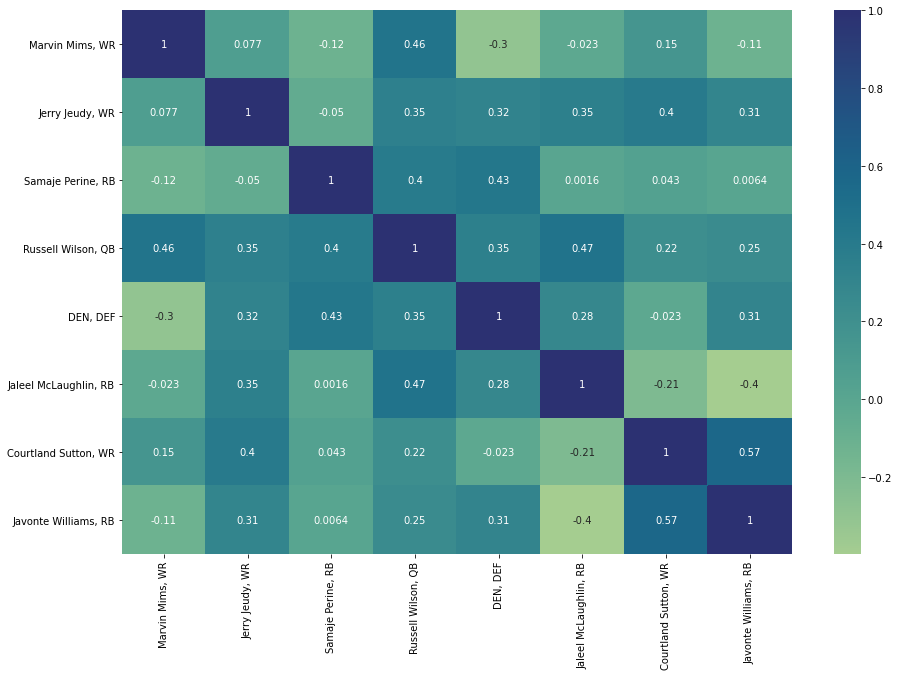

CLE


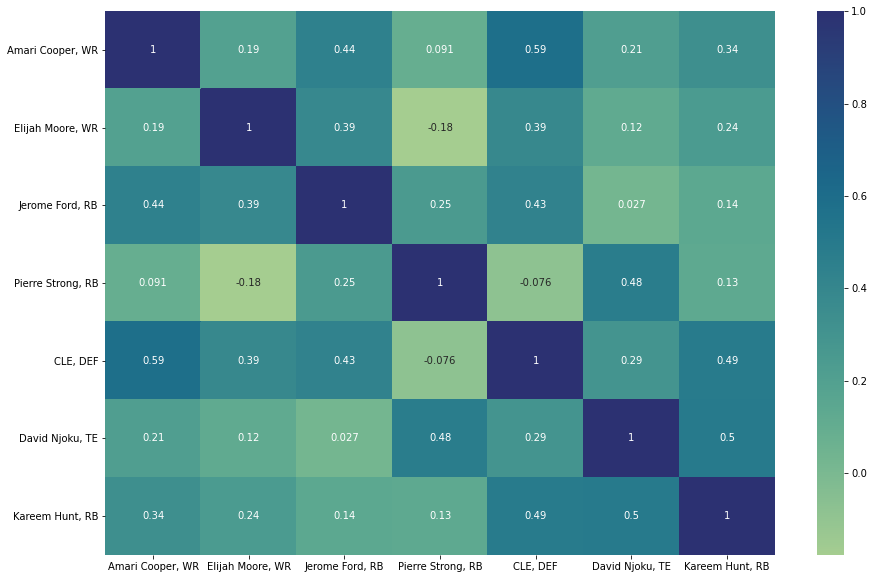

CIN


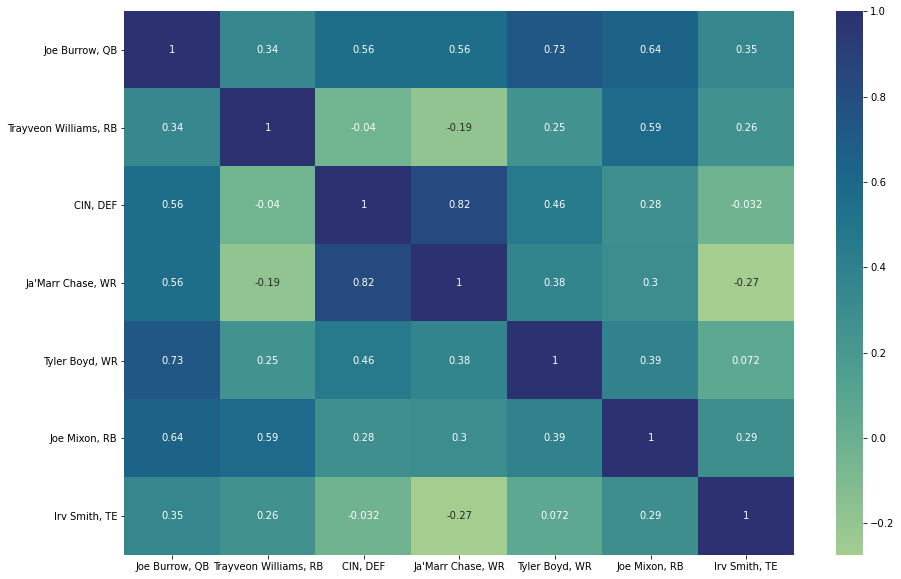

TB


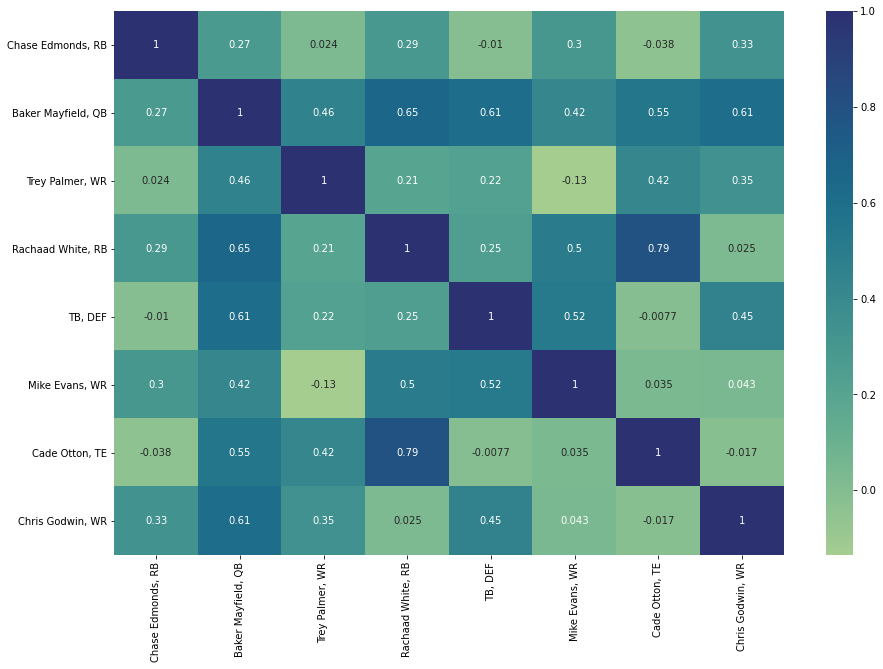

TEN


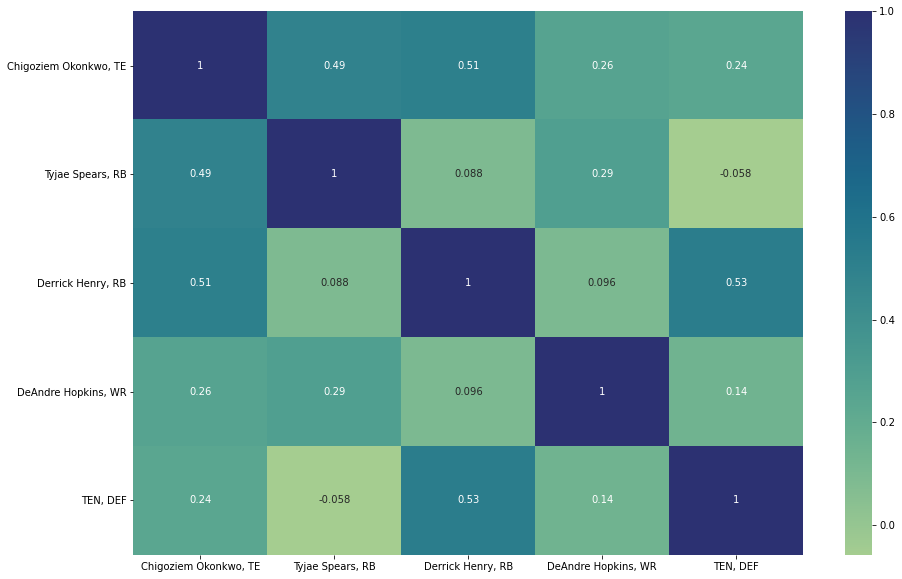

PIT


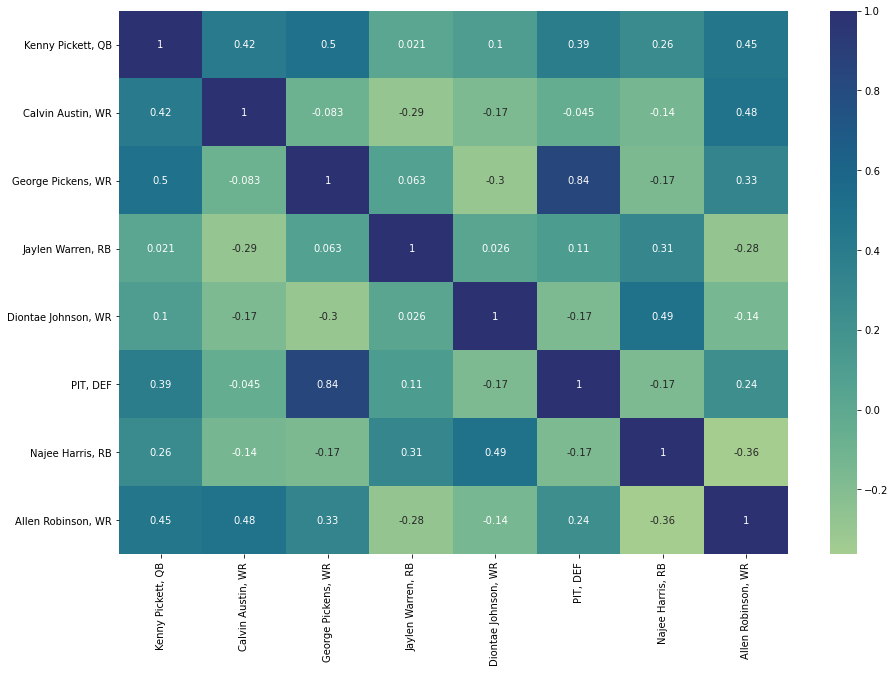

SEA


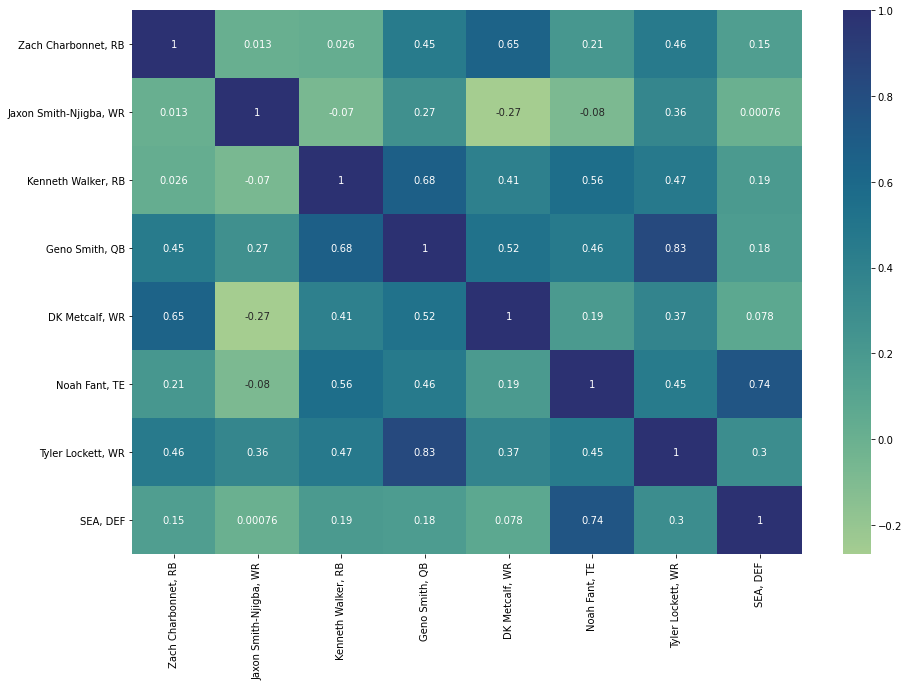

HOU


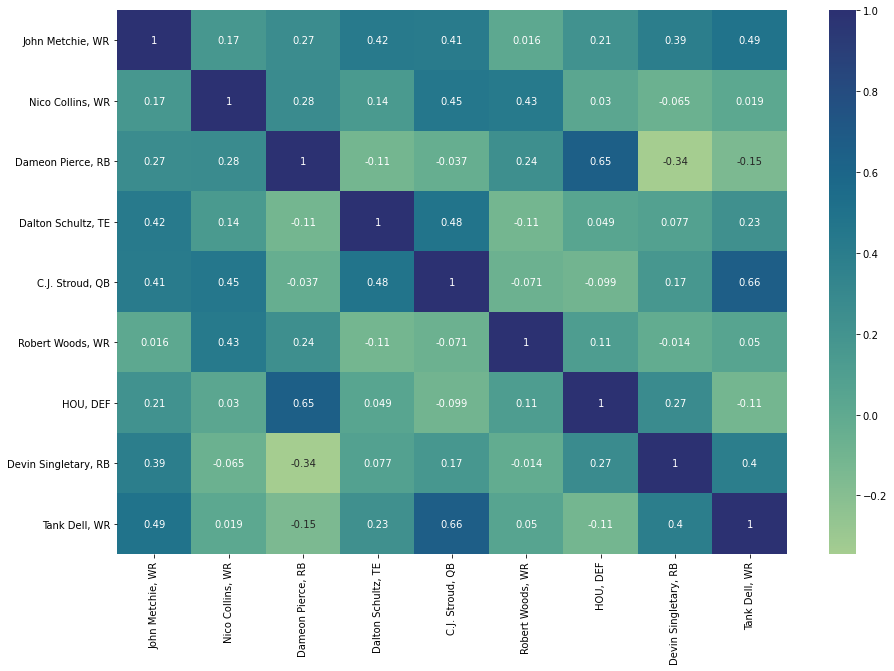

WAS


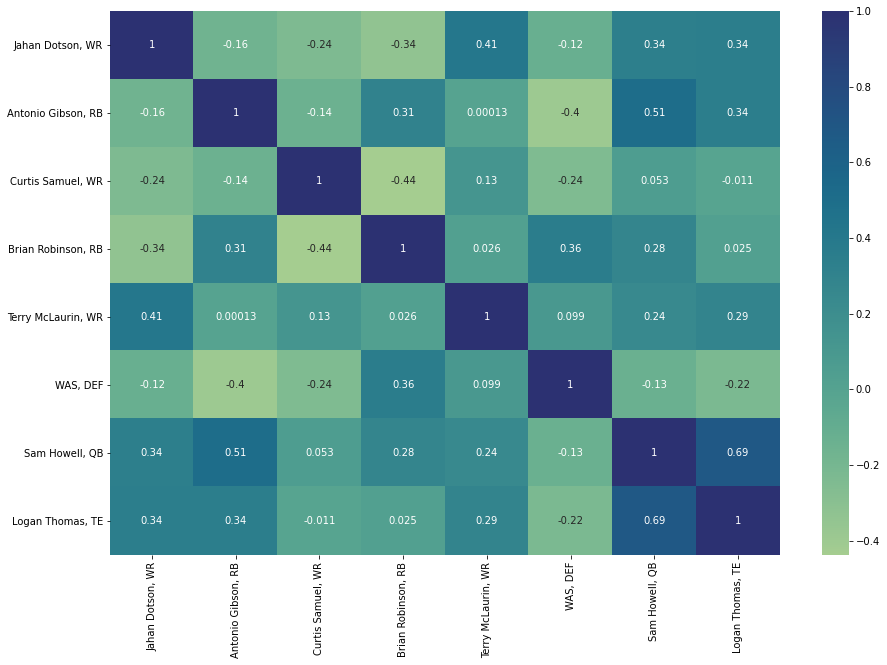

GB


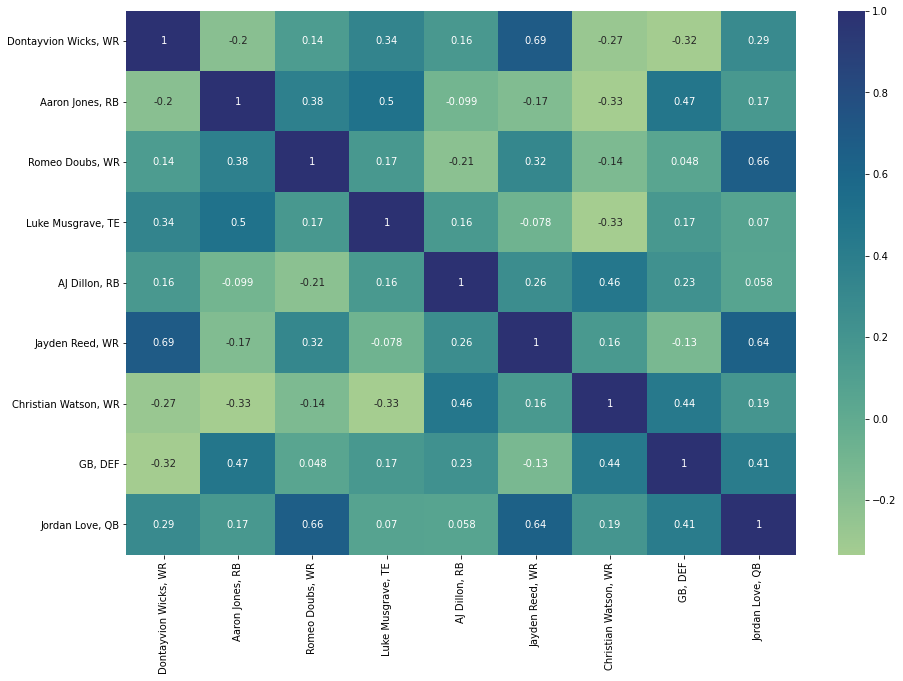

In [380]:
import seaborn as sns

atmost = season_data[season_data.drop(columns='Team').eq(0).sum(axis=1).lt(6)] # <==== Players must play at least some games

for team in team_ids:
    print(team)
    temp = atmost[atmost.Team == team].filter(like = 'Week').T
    temp = temp.loc[:, (temp != 0).any(axis=0)]
    temp = temp.corr()

    plt.figure(figsize = (15,10))
    sns.heatmap(temp, cmap="crest",annot=True)
    plt.show()

# UNDERSTANDING DISTRIBUTION OF POINTS SCORED

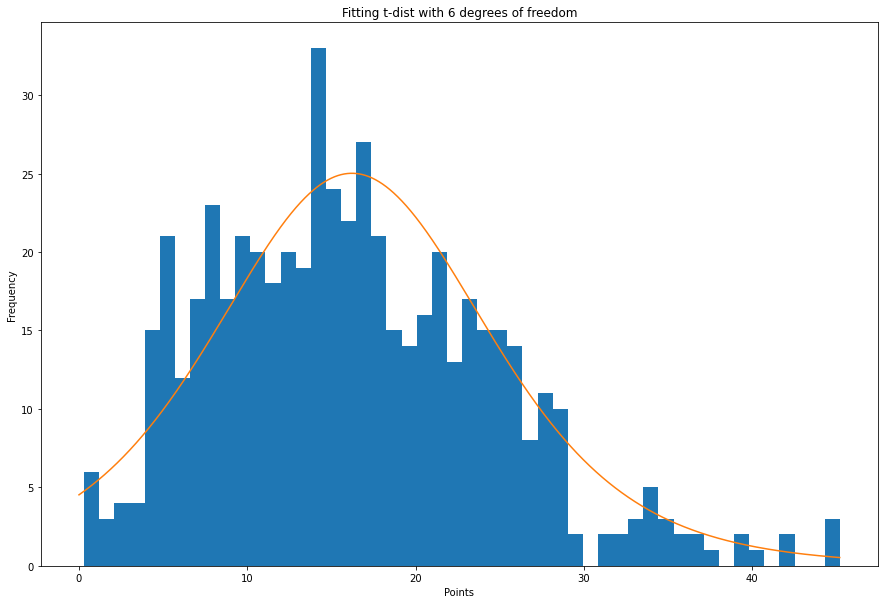

In [399]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm 

best_players = list(season_data.mean(axis = 1).sort_values().index[-50:])

def turn_data_to_list(data):
    data = data.values.tolist()
    lst = []
    for ele in data:
        lst += ele
    lst = [i for i in lst if (i != 0) and not (np.isnan(i))]
    return np.array(lst)

plt.figure(figsize=(15,10))
data_list=turn_data_to_list(season_data.loc[best_players].filter(like = 'Week'))
plt.hist(data_list, bins = 50)
x_axis = np.arange(0, max(data_list), 0.01) 
mean = data_list.mean()
sd = data_list.std()
df = 6
plt.plot(x_axis, t.pdf(x_axis, df, mean, sd)*len(data_list))

plt.ylabel('Frequency')
plt.xlabel('Points')
plt.title(f'Fitting t-dist with {df} degrees of freedom')

plt.show() 

In [ ]:
import urllib.request, json 
with urllib.request.urlopen("https://api.sleeper.app/v1/players/nfl") as url:
    player_ids = json.load(url)
    print(player_ids)